<center>

# **Pemanfaatan Machine Learning (ML) pada Klasifikasi Spam Email menggunakan Algoritma K-Nearest Neighbors (KNN) dan Support Vector Machine (SVM)**
</center>

Spam email merupakan email yang tidak diinginkan dan mengganggu, seperti
iklan, penipuan, atau malware. Klasifikasi spam email penting untuk
melindungi pengguna dari konten berbahaya. Machine learning (ML)
menawarkan solusi efektif dengan menggunakan algoritma seperti K-Nearest
Neighbors (KNN) dan Support Vector Machine (SVM).
KNN bekerja dengan mencari tetangga terdekat dalam data training untuk
mengklasifikasikan email baru. Kelebihannya sederhana, mudah dipahami, dan
tidak perlu pra-pemrosesan data rumit. Kekurangannya sensitif terhadap
outlier dan kinerjanya menurun pada data berdimensi tinggi.
SVM bertujuan menemukan hyperplane yang memisahkan data menjadi dua
kelas dengan margin maksimum. Kelebihannya efektif pada data berdimensi
tinggi dan tahan terhadap outlier. Kekurangannya kompleksitas komputasi
tinggi dan sensitif terhadap pemilihan parameter.

**KATA KUNCI-** Spam email, Klasifikasi email, Machine learning, K-Nearest
Neighbors (KNN), Support Vector Machine (SVM)

**Tujuan** 
hasil klasifikasi menggunakan KNN dan SVM pada dataset email adalah untuk mengevaluasi dan membandingkan kinerja kedua model dalam mengklasifikasikan email sebagai spam atau non-spam (ham). 

Evaluasi ini dilakukan melalui beberapa metrik penting seperti accuracy, precision, recall, F1-score, dan visualisasi confusion matrix. 

<center>

**GABRIELLA FANI SM**
**A11.2022.14441(4413)**

</center>

<center> 

## **ALUR PENYELESAIAN** 
</center>

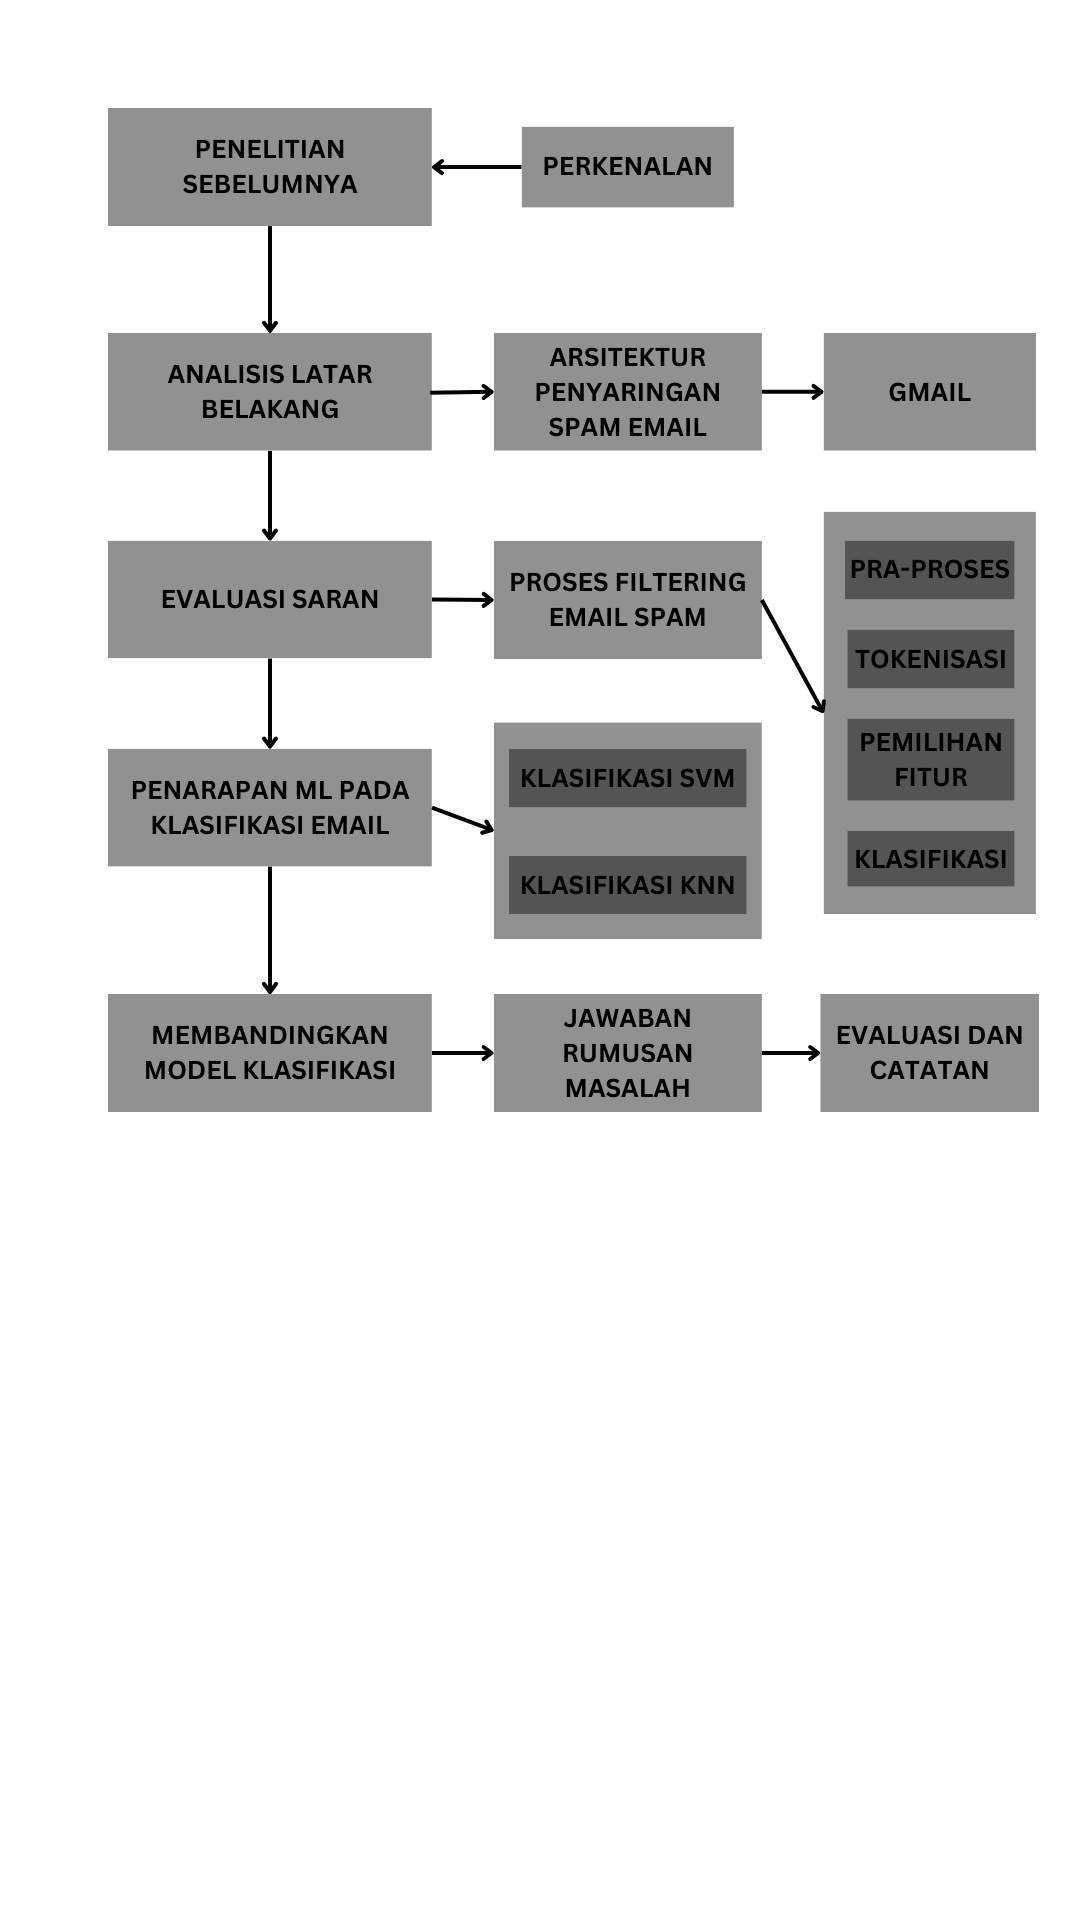

In [13]:
Image("alur.png", width=300)

**import Library**

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**Pandas** untuk membaca, menulis, dan memproses data dalam format seperti CSV, Excel, dan DataFrame.

**NumPy** library komputasi numerik yang efisien, untuk operasi matematika pada array multidimensi dan matriks.

**Seaborn** untuk visualisasi data yang dibangun

**Matplotlib.pyplot** sub-library dari Matplotlib yang digunakan untuk membuat plot dan visualisasi data

**Scikit-learn Metrics** mengevaluasi kinerja model pembelajaran mesin, termasuk confusion matrix, akurasi, dan laporan klasifikasi.

**KNeighborsClassifier** algoritma pembelajaran mesin untuk klasifikasi menggunakan metode K-Nearest Neighbors (KNN).

**SVC** adalah algoritma pembelajaran mesin untuk klasifikasi menggunakan Support Vector Machine (SVM).

**Train-Test Split** digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model dan satu untuk pengujian model.

**StandardScaler** digunakan untuk menormalkan fitur-fitur data dengan menghapus rata-rata dan menskalakan ke varians unit (standar deviasi = 1).

**LabelEncoder** encoder yang digunakan untuk mengonversi label kategori menjadi angka 


### **import dataset**

In [89]:
data = pd.read_csv('email_classification.csv')
data.head(5)

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


dataset diambil dari kaggle https://www.kaggle.com/datasets/prishasawhney/email-classification-ham-spam

<center> 

## **EDA dan Featuring Dataset** 
</center>

### **info data**

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


### **jumlah kolom & baris**

In [91]:
print("Baris : ", data.shape[0])
print("Kolom : ", data.shape[1])

Baris :  179
Kolom :  2


### **cek apakah ada data yang kosong**

In [92]:
data.isnull().sum()

email    0
label    0
dtype: int64

**cek apakah ada data yang duplicated**

**visualisasi distribusi gender**

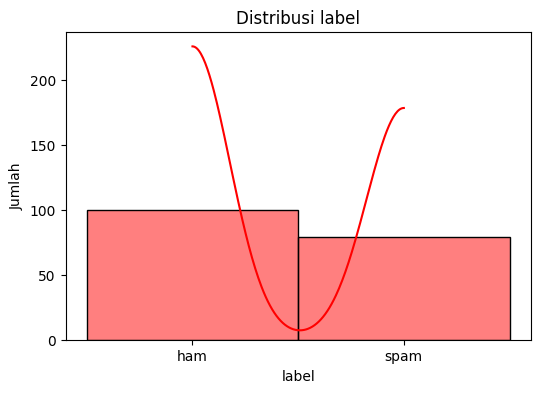

In [94]:
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='label', bins=10, kde=True, color='red')
plt.title('Distribusi label')
plt.xlabel('label')
plt.ylabel('Jumlah')
plt.show()

In [95]:
# Inisialisasi dictionary untuk menyimpan LabelEncoder
label_encoders = {}
cat_cols = []
for i in data.columns:
    if data[i].dtypes == "object":
        cat_cols.append(i)

# Encode kolom kategorikal dan simpan LabelEncoder di dictionary
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

**cek lagi datanya**

In [96]:
data.head(5)

,email,label
0,58,0
1,34,0
2,81,0
3,114,1
4,141,0


In [97]:
print(data['email'].unique());


[ 58  34  81 114 141 146 137  17 125 105  24  80 104  93  70  94 101 115
   5  13 129  29  47 118 111  96 126  89  53  26  78 119  16 128  91 107
 108  65  82  90 124  59  61  49  52 127  27 106  15  54 109  57  99 140
  67 135 148  31  23  62 120   9  85 142  74 116  33  45  72   0   4  37
   2  10  48  30 147  51  20  55 133  71 112  95 145 113 130  46  40  42
  44 123  11 117 149  41  12 143  64  19 138  43  25 103 134  79  68  56
  21  69  98  86  83  97 100   6   3  66  73 102  50  60  18  63  77  22
  76  84 110   8 122  28  88 131  92  75  35 132   1  39  14 136   7 121
  36  87  32 139 144  38]


mengakses kolom email dari dataframe, lalu mengembalikan array numpy dari nilai-nilai unik yang ada dalam kolom email.

In [98]:
x = data.drop(['label'], axis=1)
y = data['label']

print(x.shape)
print(y.shape)

(179, 1)
(179,)


artinya, 179 baris 1 kolom dan 179 baris

In [99]:
normal = StandardScaler()
data = normal.fit_transform(data)
data

array([[-0.40455195, -0.88881944],
       [-0.94868318, -0.88881944],
       [ 0.11690715, -0.88881944],
       [ 0.8650876 ,  1.1250879 ],
       [ 1.47723524, -0.88881944],
       [ 1.59059591, -0.88881944],
       [ 1.3865467 ,  1.1250879 ],
       [-1.33410947, -0.88881944],
       [ 1.11448108, -0.88881944],
       [ 0.66103839,  1.1250879 ],
       [-1.17540453, -0.88881944],
       [ 0.09423502, -0.88881944],
       [ 0.63836625,  1.1250879 ],
       [ 0.38897277, -0.88881944],
       [-0.13248633, -0.88881944],
       [ 0.4116449 , -0.88881944],
       [ 0.57034985,  1.1250879 ],
       [ 0.88775973,  1.1250879 ],
       [-1.60617509, -0.88881944],
       [-1.42479801,  1.1250879 ],
       [ 1.20516962,  1.1250879 ],
       [-1.06204385, -0.88881944],
       [-0.65394543, -0.88881944],
       [ 0.95577614,  1.1250879 ],
       [ 0.79707119,  1.1250879 ],
       [ 0.45698917, -0.88881944],
       [ 1.13715322,  1.1250879 ],
       [ 0.29828423, -0.88881944],
       [-0.51791262,

menormalkan data numerik dalam dataframe sehingga setiap fitur memiliki rata-rata 0 dan standar deviasi 1. dan mengubah data teks menggunakan standardscaler


**visualisasi data yang sudah di standarisasi**

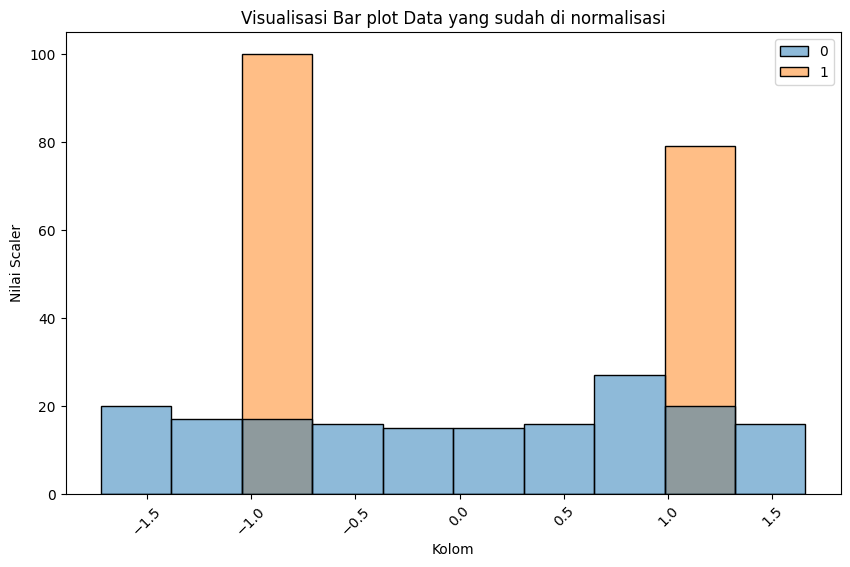

In [100]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data)
plt.title('Visualisasi Bar plot Data yang sudah di normalisasi')
plt.xlabel('Kolom')
plt.ylabel('Nilai Scaler')
plt.xticks(rotation=45)
plt.show()

**membagi data menjadi data training dan data testing**

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<center>

# **PROSES LEARNING DAN PERFORMA MODEL**
</center>

## **proses modeling KNN & evaluasi model**

In [102]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
y_pred = knn.predict(x_test)
clf_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy SVM: {:.2f} %".format(clf_acc*100))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.98        22

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Accuracy SVM: 97.22 %


kinerja yang sangat baik dengan akurasi 97.22%. Precision dan recall juga sangat tinggi untuk kedua kelas, yang berarti model memiliki kemampuan yang sangat baik dalam mengidentifikasi kelas.

**testing model dengan data baru**

In [103]:
testing = {"Email": [58]};

testing = pd.DataFrame(testing)
testing

,Email
0,58


**standarisasi data testing lagi sekalian memodelkan data testing**

In [104]:
scaler_testing = normal.fit_transform(testing)
y_pred_new = knn.predict(scaler_testing)

print("hasil klasifikasi : ",y_pred_new)

hasil klasifikasi :  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**menambahkan kolom hasil klasifikasi ke data frame**

In [105]:
testing['hasil Klasifikasi'] = y_pred_new
testing

,Email,hasil Klasifikasi
0,58,1


## **proses modeling SVM & evaluasi model**

In [106]:
clf = SVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
clf_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy SVM: {:.2f} %".format(clf_acc*100))

              precision    recall  f1-score   support

           0       0.57      0.93      0.70        14
           1       0.92      0.55      0.69        22

    accuracy                           0.69        36
   macro avg       0.74      0.74      0.69        36
weighted avg       0.78      0.69      0.69        36

Accuracy SVM: 69.44 %


kinerja yang cukup dengan akurasi 69.44%.

Precision:
Precision untuk kelas 0 cukup rendah (57%), yang menunjukkan bahwa dari semua prediksi kelas 0, hanya 57% yang benar-benar kelas 0.
Precision untuk kelas 1 sangat tinggi (92%), yang menunjukkan bahwa dari semua prediksi kelas 1, 92% benar-benar kelas 1.

Recall:
Recall untuk kelas 0 sangat tinggi (93%), yang menunjukkan bahwa dari semua contoh sebenarnya kelas 0, 93% terdeteksi dengan benar.
Recall untuk kelas 1 cukup rendah (55%), yang menunjukkan bahwa dari semua contoh sebenarnya kelas 1, hanya 55% yang terdeteksi dengan benar.

F1-Score(kinerja model):
F1-score untuk kedua kelas cukup seimbang, yaitu 0.70 untuk kelas 0 dan 0.69 untuk kelas 1.

In [107]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  1]
 [10 12]]


13 (Non-Spam yang diprediksi dengan benar sebagai Non-Spam) |
1 (Non-Spam yang diprediksi salah sebagai Spam) |
10 (Spam yang diprediksi salah sebagai Non-Spam) |
12 (Spam yang diprediksi dengan benar sebagai Spam) 

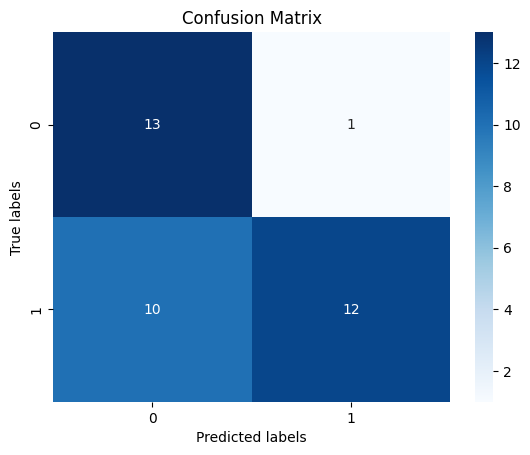

preision: 56.52173913043478
recall: 0.9285714285714286
accuracy:69.44 %
f_measure: 1.827125790583275


In [108]:
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#compute precision,recall,accuracy,f-measure by using confusion matrix
precision = 100*cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
f_measure=2*precision*recall/(precision+recall)
print("preision:",precision)
print("recall:",recall)
print("accuracy:{:.2f} %".format(accuracy*100))
print("f_measure:",f_measure)

In [109]:
newdata = {"Email": [100]};

newdata = pd.DataFrame(newdata)
newdata

,Email
0,100


In [110]:
scaler_newdata = normal.fit_transform(newdata)
y_pred_new = knn.predict(scaler_newdata)

print("hasil klasifikasi : ",y_pred_new)

hasil klasifikasi :  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [111]:
testing['hasil Klasifikasi'] = y_pred_new
testing

,Email,hasil Klasifikasi
0,58,1


<center>

# **HASIL DAN KESIMPULAN**

</center>

### **HASIL**
**Akurasi:**
        Model KNN memiliki akurasi yang jauh lebih tinggi (97.22%) dibandingkan dengan SVM (69.44%).

**Precision, Recall, dan F1-Score:**
        KNN menunjukkan precision, recall, dan F1-score yang lebih baik untuk kedua kelas dibandingkan dengan SVM. Ini menunjukkan bahwa KNN lebih mampu menangkap dan mengklasifikasikan kedua kelas dengan benar.

**Confusion Matrix:**
        KNN memiliki sangat sedikit kesalahan klasifikasi dibandingkan dengan SVM. KNN hanya membuat 1 kesalahan (1 false negative), sementara SVM memiliki lebih banyak kesalahan (10 false negatives dan 1 false positive).

### **KESIMPULAN**

**KNN Lebih Baik:** 
    Berdasarkan hasil di atas, KNN menunjukkan kinerja yang lebih unggul dibandingkan dengan SVM untuk dataset dan tugas klasifikasi ini. Ini mencakup akurasi yang lebih tinggi dan metrik evaluasi lainnya yang lebih baik.
    
**Penyesuaian Parameter:** 
    Meskipun KNN lebih baik dalam kasus ini, penting untuk melakukan penyesuaian hyperparameter untuk kedua model untuk memastikan kinerja optimal.
    
**Validasi Kinerja:** 
    Selain itu, melakukan validasi silang (cross-validation) dapat memberikan gambaran yang lebih baik tentang kinerja model pada data yang belum pernah dilihat sebelumnya.